# Perceptron

In [ ]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """a perceptron is one linear layer"""
    def __init__(self, input_dim):
        """input_dim : size of input features"""
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        
    def forward(self, x_in):
        """Forward pass the perceptron
        Args:
            x_in (torch.Tensor): input data with shape (batch, num_features)
        Returns:
            resulting tensor
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

# Activation Functions

## Sigmoid

mapping x to range between 0 and 1

c:\users\miqda\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


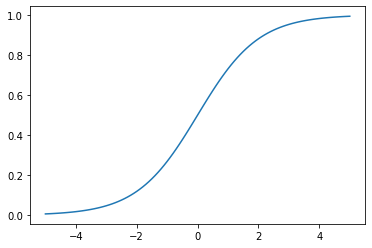

In [ ]:
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

## Tanh
mapping x to range between -1 and 1

c:\users\miqda\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


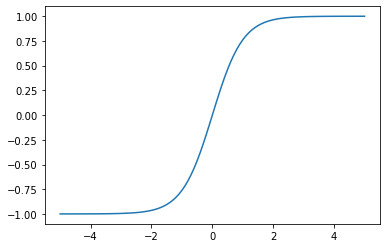

In [ ]:
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

## ReLu
returns the maximum value of 0 and x

clipping negative values to 0

c:\users\miqda\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


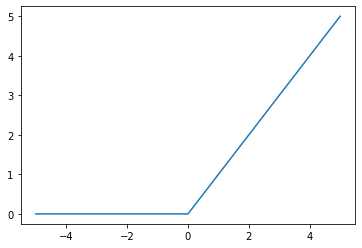

In [ ]:
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

## PreLu


using learned parameter as a leak coefficient so that the negative values is not 0

c:\users\miqda\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


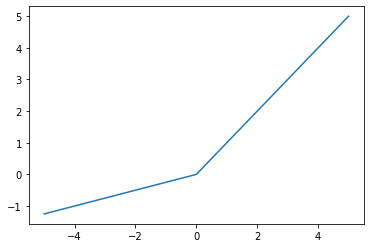

In [ ]:
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

## Softmax

mapping the input to values between 0 and 1.

the operation involve dividing the values with the sum of all inputs

In [ ]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1,3)
y = softmax(x_input)

print(x_input)
print(y)
print(torch.sum(y, dim=1))

tensor([[ 0.4518, -0.7268,  0.5156]])
tensor([[0.4213, 0.1296, 0.4491]])
tensor([1.])


# Loss Functions

## Mean Squared Error loss

average of squares of the difference between predicted and target values

In [ ]:
mse = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse(outputs, targets)
print(loss)

tensor(2.4460, grad_fn=<MseLossBackward>)


## Cross Entropy Loss

probability of class membership. used in multiclass classification

In [ ]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.rand(2,5, requires_grad=True)
targets = torch.tensor([1,3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(outputs)
print(loss)

tensor([[0.5652, 0.9507, 0.7263, 0.8049, 0.9538],
        [0.3492, 0.7572, 0.1355, 0.4859, 0.6850]], requires_grad=True)
tensor(1.5501, grad_fn=<NllLossBackward>)


## Binary Cross-Entropy Loss

probability of each class membership. used in binary classification

In [ ]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

# calculate the probabilities versus the actual outputs
probabilities = sigmoid(torch.rand(1,5, requires_grad=True))
outputs = torch.tensor([1,1,0,0,1], dtype=torch.float32)

loss = bce_loss(probabilities, outputs)
print(probabilities)
print(loss)

tensor([[0.6813, 0.6832, 0.5654, 0.6786, 0.5323]], grad_fn=<SigmoidBackward>)
tensor(0.6727, grad_fn=<BinaryCrossEntropyBackward>)


c:\users\miqda\anaconda3\envs\datascience\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([1, 5])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


# Supervised Learning Concepts

In [ ]:
# instantiating an optimizer
import torch.optim as optim

input_dim = 2
learning_rate = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=learning_rate)

In [ ]:
# the code is not for run
# since the book did not give the toy data

# each epoch is one cycle of training
for epoch_i in range(n_epochs):
    # a training cycles consists of 
    # multiple batches
    for batch_i in range(n_batches):
        # Step 1: getting the data
        X_train, y_train = get_toy_data(batch_size)

        # Step 2: Clear the gradients
        perceptron.zero_grad()

        # Step 3: Compute the prediction
        # using forward pass
        y_pred = perceptron(X_train, apply_sigmoid=True)

        # Step 4: Compute the loss
        loss = bce_loss(y_pred, y_train)

        # Step 5: Propagate the loss signal backward
        loss.backward()

        # Step 6: Trigger the optimization to perform update
        optimizer.step()

NameError: name 'get_toy_data' is not defined

# Classifying Sentiment of Restaurant Review

## ReviewDataset Class

In [25]:
# Create Dataset class
from torch.utils.data import Dataset
import pandas as pd

class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        self.review_df = review_df
        self._vectorizer = vectorizer
        
        self.train_df = self.review_df[self.review_df.split == 'train']
        self.train_size = len(self.train_df)
        
        self.val_df = self.review_df[self.review_df.split == 'val']
        self.val_size = len(self.val_df)
        
        self.test_df = self.review_df[self.review_df.split == 'test']
        self.test_size = len(self.test_df)
        
        self._lookup_dict = {'train': (self.train_df, self.train_size),
                            'val': (self.val_df, self.val_size),
                            'test': (self.test_df, self.test_size)}
        
        self.set_split('train')
        
    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """Load dataset from csv and returns the dataset object
        and vectorizer"""
        review_df = pd.read_csv(review_csv)
        return cls(review_df, ReviewVectorizer.from_dataframe(review_df))
    
    def get_vectorizer(self):
        """Get vectorizer"""
        return self._vectorizer
    
    def set_split(self, split='train'):
        """Set the split from data"""
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]
        
    def __len__(self):
        return self._target_size
    
    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        Args:
            index (int): the index to the data point
        Returns:
            a dict of the data point's features (x_data) and label (y_target)
        """
        row = self._target_df.iloc[index]
        
        review_vector = self._vectorizer.vectorize(row.review)
        
        rating_index = self._vectorizer.rating_vocab.lookup_token(row.rating)
        
        return {
            'x_data' : review_vector,
            'y_target' : rating_index
        }
    
    def get_num_batches(self, batch_size):
        """Given the batch size return the number of batches in the dataset"""
        return self._target_size // batch_size

## Vocabulary Class

In [19]:
# create vocabulary class
class Vocabulary(object):
    """Class to extract and process vocabularies for mapping"""
    
    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx
        
        self._idx_to_token = {
            idx: token for token, idx in self._token_to_idx.items()
        }
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token)
            
    def to_serializeable():
        """return a serializeable dictionary"""
        return {
            'token_to_idx': self._token_to_idx,
            'add_unk': self._add_unk,
            'unk_token': self._unk_token
        }
    
    @classmethod
    def from_serializeable(cls, contents):
        """create vocabulary object from serialize dictionary"""
        return cls(**contents)
    
    def add_token(self, token):
        """Add a token and return it's index"""
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def lookup_token(self, token):
        """get the index of a token 
        if not exist returns the unk_index"""
        if self._add_unk:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]
        
    def lookup_index(self, index):
        if index not in self._idx_to_token:
            raise KeyError("the index %d is not in the vocabulary" % index)
        return self._idx_to_token[index]
    
    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)
    
    def __len__(self):
        return len(self._token_to_idx)

## Vectorizer Class

In [3]:
import numpy as np
from collections import Counter
import string

class ReviewVectorizer(object):
    def __init__(self, review_vocab, rating_vocab):
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab
        
    def vectorize(self, review):
        """Create one_hot vector for review"""
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1
                
        return one_hot
    
    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """Instantiate a ReviewVector from dataset"""
        
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        
        # Add ratings
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)
            
        # add words to vocabulary if the word
        # is more than cutoff
        words_count = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    words_count[word] += 1
                    
        for word, count in words_count.items():
            if count > cutoff:
                review_vocab.add_token(word)
                
        return cls(review_vocab, rating_vocab)
                
        
    @classmethod
    def from_serializeable(cls, contents):
        """Instantiate vectorizer from serializeable"""
        review_vocab = Vocabulary.from_serializeable(contents['review_vocab'])
        rating_vocab = Vocabulary.from_serializeable(contents['rating_vocab'])
        
        return cls(review_vocab, rating_vocab)
    
    def to_serializeable(cls, contents):
        return {
            'review_vocab': cls.review_vocab.to_serializeable(),
            'rating_vocab': cls.rating_vocab.to_serializeable()
        }

## Generate Batches function

In [26]:
from torch.utils.data import DataLoader

def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader. It will
    ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                           shuffle=shuffle, drop_last=drop_last)
    
    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

## Review Classifier

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class ReviewClassifier(nn.Module):
    """Review class based on perceptron"""
    def __init__(self, num_features):
        """Instantiate classifier"""
        super(ReviewClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features= num_features,
                            out_features= 1)
        
    def forward(self, x_in, apply_sigmoid=False):
        """Forward pass the data"""
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = F.sigmoid(y_out)
        return y_out

## Defining Training Routine

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
from argparse import Namespace

args = Namespace(
    # Data information
    frequency_cutoff = 25,
    model_state_file = '/content/drive/My Drive/Colab Notebooks/Data/yelp_reviews/model.pth',
    review_csv = '/content/drive/My Drive/Colab Notebooks/Data/yelp_reviews/reviews_with_splits_lite.csv',
    save_dir = '/content/drive/My Drive/Colab Notebooks/Data/yelp_reviews/',
    vectorizer_file = '/content/drive/My Drive/Colab Notebooks/Data/yelp_reviews/vectorizer.json',
    # Training HyperParameters
    batch_size = 128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    cuda=False
)

In [27]:
import torch.optim as optim
import torch

# create variables to record
# the training process
def make_train_state(args):
    return {
        'epoch_index':0,
        'train_loss':[],
        'train_acc':[],
        'val_loss': [],
        'val_acc': [],
        'test_loss': -1,
        'test_acc': -1,
        'cuda': False,
    }

def compute_accuracy(y_pred, y_target):
    y_target = y_target.cpu()
    y_pred_indices = (torch.sigmoid(y_pred)>0.5).cpu().long()#.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

train_state = make_train_state(args)

if torch.cuda.is_available():
    args.cuda = True
args.device = torch.device("cuda" if args.cuda else "cpu")

# instantiate dataset and vectorizer
dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
vectorizer = dataset.get_vectorizer()

# instantiate model
classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))
classifier = classifier.to(args.device) # move data to device

# loss and optimizer
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)

# checking
print("Using CUDA : ", args.cuda)

Using CUDA :  True


In [32]:
# Create training loop
from tqdm import tqdm.notebook.tqdm

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)

try:
  for epoch_index in range(args.num_epochs):
      train_state['epoch_index'] = epoch_index
      
      # setup batch generator
      # set loss and train mode on
      dataset.set_split('train')
      batch_generator = generate_batches(dataset=dataset,
                                        batch_size=args.batch_size,
                                        device=args.device)
      
      running_loss = 0.0
      running_acc = 0.0
      classifier.train()
      
      for batch_index, batch_dict in enumerate(batch_generator):
          # step 1 zero the gradients
          optimizer.zero_grad()
          
          # step 2 compute the output
          y_pred = classifier(x_in=batch_dict['x_data'].float())
          
          # step 3 compute the loss
          loss = loss_func(y_pred, batch_dict['y_target'].float())
          loss_batch = loss.item()
          running_loss += (loss_batch - running_loss) / (batch_index + 1)
          
          # step 4 use loss to produce gradients
          loss.backward()
          
          # step 5 use optimizer to take the gradient step
          optimizer.step()
          
          # step 6 compute the acccuracy
          acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
          running_acc += (acc_batch - running_acc) / (batch_index + 1)

          # update bar
          train_bar.set_postfix(loss=running_loss, 
                                acc=running_acc, 
                                epoch=epoch_index)
          train_bar.update()
          
      train_state['train_loss'].append(running_loss)
      train_state['train_acc'].append(running_acc)
      
      # Iterate over val dataset
      # setup: batch generator, set loss and acc to 0, set eval mode on
      dataset.set_split('val')
      batch_generator = generate_batches(dataset,
                                        batch_size=args.batch_size,
                                        device=args.device)
      
      running_loss = 0.
      running_acc = 0.
      classifier.eval()
      
      for batch_index, batch_dict in enumerate(batch_generator):
          # step 1. compute the output
          y_pred = classifier(x_in=batch_dict['x_data'].float())
          
          # step 2. compute the loss
          loss = loss_func(y_pred, batch_dict['y_target'].float())
          loss_batch = loss.item()
          running_loss += (loss_batch - running_loss) / (batch_index + 1)
          
          # step 3. compute the accuracy
          acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
          running_acc += (acc_batch - running_acc) / (batch_index + 1)
          train_state['val_loss'].append(running_loss)
          train_state['val_acc'].append(running_acc)
          
      train_state['val_loss'].append(running_loss)
      train_state['val_acc'].append(running_acc)

      epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop") 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


# Evaluating


In [33]:
# evaluating using test data

dataset.set_split('test')
batch_generator = generate_batches(dataset,
                                   args.batch_size,
                                   device=args.device)

running_loss = 0.
running_acc = 0.
classifier.eval()

for batch_index, batch_dict in enumerate(batch_generator):
  # compute the output
  y_pred = classifier(x_in=batch_dict['x_data'].float())

  # compute the loss
  loss = loss_func(y_pred, batch_dict['y_target'].float())
  loss_batch = loss.item()
  running_loss += (loss_batch - running_loss) / (batch_index + 1)

  # compute the accuracy
  acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
  running_acc += (acc_batch - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

print("Test loss : {:.3f}".format(train_state['test_loss']))
print("Test acc : {:.3f}".format(train_state['test_acc']))

Test loss : 0.463
Test acc : 89.531


In [47]:
# running inference mode
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text

  

def predict_rating(review, classifier, vectorizer, decision_threshold=0.5):
    """Predict the rating of a review"""
    review = preprocess_text(review)
    
    vectorized_review = torch.tensor(vectorizer.vectorize(review))
    print("vectorized review ", vectorized_review)
    result = classifier(vectorized_review.view(1, -1))
    
    probability_value = torch.sigmoid(result).item()
    index = 1
    if probability_value < decision_threshold:
        index = 0

    return vectorizer.rating_vocab.lookup_index(index)

In [48]:
test_review = "did not going well"

classifier = classifier.cpu()
prediction = predict_rating(test_review, classifier, vectorizer, decision_threshold=0.5)
print("{} -> {}".format(test_review, prediction))

vectorized review  tensor([0., 0., 0.,  ..., 0., 0., 0.])
did not going well -> negative


In [46]:
# Inspecting

# Sort weights
fc1_weights = classifier.fc1.weight.detach()[0]
_, indices = torch.sort(fc1_weights, dim=0, descending=True)
indices = indices.numpy().tolist()
print('fc1_wegiths ', fc1_weights.shape)
print("indices ", indices)

# Top 20 words
print("Influential words in Positive Reviews:")
print("--------------------------------------")
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))
    
print("====\n\n\n")

# Top 20 negative words
print("Influential words in Negative Reviews:")
print("--------------------------------------")
indices.reverse()
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))

fc1_wegiths  torch.Size([8945])
indices  [8619, 8323, 8918, 8789, 8438, 8667, 8936, 8871, 8915, 8578, 8937, 8425, 5107, 8185, 8202, 5832, 8145, 8846, 6074, 7517, 8673, 8798, 7228, 2834, 745, 7950, 8849, 8729, 7360, 1474, 8842, 7453, 7806, 3650, 8015, 5964, 8939, 7784, 8491, 8212, 7736, 8429, 8030, 8912, 7869, 8219, 8933, 7944, 6297, 7634, 8923, 5947, 6954, 7744, 8690, 8061, 8938, 3019, 8925, 8943, 8848, 8562, 6364, 7786, 8932, 8935, 7009, 8940, 5481, 8944, 8198, 8931, 7835, 3802, 6126, 7603, 7886, 5444, 6841, 8253, 8631, 4952, 8626, 7829, 8553, 6102, 8751, 1711, 8561, 6110, 8600, 8510, 8930, 6803, 7710, 8335, 6198, 8414, 8338, 7912, 7277, 4097, 8509, 8638, 8926, 8146, 5888, 8243, 7306, 7282, 8811, 8731, 4809, 8696, 4764, 8362, 8324, 3769, 8675, 6153, 8068, 1837, 759, 8922, 7883, 8591, 5799, 7542, 7762, 7938, 7717, 7464, 4587, 6729, 8452, 7966, 8893, 5070, 8683, 8941, 6702, 6387, 8874, 5630, 6704, 8242, 8352, 8651, 8331, 5868, 8512, 7028, 8659, 8036, 8869, 7978, 8402, 8608, 8890, 8898, 

# Summary

## How the system works
1. Encode the review sentence using one hot encoding
and the result is vector contains 1's and 0's eg, [1 1 0 0 1]
1. each index of the vector represent the position of word in vocabulary
1. then the vector got feeded into the classifier.
1. the classifier returns a value then mapped into 1 or 0.
1. the mapped value represents the index of rating_vocabulary which are positive or negative.